In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
dfin = pd.read_csv('fct_invoice.csv')
dfcus=pd.read_json('dim_customer.json')

In [33]:
#Number of unique customers, done by getting the unique customer ids and getting it's length
len(dfin.customer_id.unique())
#5191

5191

In [47]:
#Get the unique category using unique and the number using len
print(dfin.category.unique())
print(len(dfin.category.unique()))
#['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys''Technology' 'Souvenir']
#8 categories

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [121]:
#Get the most famous payment method and how many times it was used
dfin.groupby('payment_method').count()
#most famous payment method is CASH, used 44447 times

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,sales
payment_method,,,,,,,,
Cash,44447,44447,44447,44447,44447,44447,44447,44447
Credit Card,34931,34931,34931,34931,34931,34931,34931,34931
Debit Card,20079,20079,20079,20079,20079,20079,20079,20079


In [135]:
dfin['sales']=dfin['quantity']*dfin['price']
dfin.groupby('category')['sales'].sum().sort_values(ascending=False).head(3)
#Top 3 categories are: Clothing, Shoes, Technology which has 1.139968e+08,6.655345e+07, and 5.786235e+07 sales respectively

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [157]:
#used to set customer_id to id to be able to merge the two data
dfin['id']=dfin['customer_id']

In [441]:
#merged the two data sets
merged=pd.merge(dfin, dfcus, on="id")

In [443]:
#After merging the two tables, get the people aged above 45, and then sum their sales
is_age=merged['age']>45
old=merged[is_age]
old['sales'].sum()
#People aged over 45 have a sale totalling of 82039768.15

82039768.15

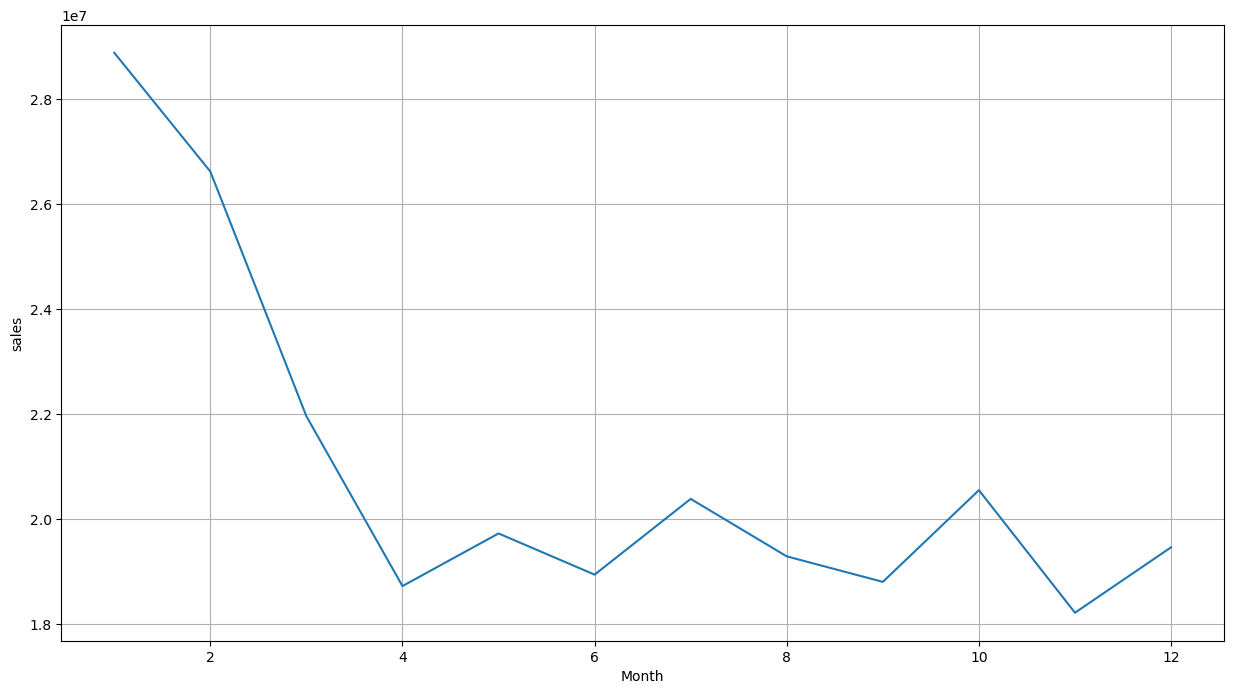

In [358]:
#get the table of sales per month from the available data:
merged['invoice_date']=pd.to_datetime(merged['invoice_date'], format="%d/%m/%Y")
monthly = merged.groupby( merged['invoice_date'].dt.month)
datesales=monthly['sales'].sum()
datesales.plot()
plt.ylabel("sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

In [467]:
#Function for range
def range(age):
    int = (age // 10) * 10
    old = int + 9
    return f"{int}-{old}"
#Apply function 
merged['agerange'] = merged['age'].apply(range)
#Make the Pivot Table
pivot_table = pd.pivot_table(
    merged,values='sales',index=['category', 'agerange'], aggfunc='sum')
pd.set_option("display.max_rows", None)
pivot_table

sales
category        agerange              
Books           10.0-19.0     12801.75
                20.0-29.0     79461.75
                30.0-39.0     84143.10
                40.0-49.0     87203.40
                50.0-59.0     74962.20
                60.0-69.0     80476.80
                70.0-79.0     54827.85
                80.0-89.0     26664.00
                nan-nan      334012.05
Clothing        10.0-19.0   1927413.84
                20.0-29.0  10250732.80
                30.0-39.0  11354126.96
                40.0-49.0  11215189.92
                50.0-59.0  10321851.76
                60.0-69.0  10660642.08
                70.0-79.0   7769371.28
                80.0-89.0   4493698.00
                nan-nan    46003764.40
Cosmetics       10.0-19.0    109619.36
                20.0-29.0    605915.32
                30.0-39.0    723544.70
                40.0-49.0    665034.96
                50.0-59.0    587780.96
                60.0-69.0    649990.76
                70.0-79.0    419082.62
                80.0-89.0    254531.60
                nan-nan     2777362.62
Food & Beverage 10.0-19.0     13582.31
                20.0-29.0     73491.96
                30.0-39.0     87246.86
                40.0-49.0     89553.29
                50.0-59.0     72425.04
                60.0-69.0     80976.09
                70.0-79.0     55050.98
                80.0-89.0     31332.93
                nan-nan      345875.59
Shoes           10.0-19.0    993281.35
                20.0-29.0   5924878.24
                30.0-39.0   7200839.66
                40.0-49.0   7025590.02
                50.0-59.0   5852857.84
                60.0-69.0   5978893.54
                70.0-79.0   4480269.05
                80.0-89.0   2628744.60
                nan-nan    26468097.17
Souvenir        10.0-19.0     12375.15
                20.0-29.0     54943.32
                30.0-39.0     64092.72
                40.0-49.0     66391.80
                50.0-59.0     54943.32
                60.0-69.0     55025.43
                70.0-79.0     38673.81
                80.0-89.0     23718.06
                nan-nan      265661.04
Technology      10.0-19.0   1129800.00
                20.0-29.0   5261550.00
                30.0-39.0   6159300.00
                40.0-49.0   5954550.00
                50.0-59.0   4435200.00
                60.0-69.0   5471550.00
                70.0-79.0   3638250.00
                80.0-89.0   1946700.00
                nan-nan    23865450.00
Toys            10.0-19.0     60426.24
                20.0-29.0    385100.80
                30.0-39.0    420582.40
                40.0-49.0    390906.88
                50.0-59.0    345067.52
                60.0-69.0    363955.20
                70.0-79.0    273244.16
                80.0-89.0    153932.80
                nan-nan     1587210.24

In [391]:
''' 
Sumary of Answers:
EASY 
1) 5191 (Based on customer ids)
2) 8 categories namely: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys''Technology' 'Souvenir']
3) Most famous payment method is CASH, used 44447 times

MEDIUM
1) Top 3 categories are: Clothing, Shoes, Technology which has 1.139968e+08,6.655345e+07, and 5.786235e+07 sales respectively
2) People aged over 45 have a sale totalling of 82039768.15
3) (REFER TO TABLE ABOVE)

HARD
                                 sales
category        agerange              
Books           10.0-19.0     12801.75
                20.0-29.0     79461.75
                30.0-39.0     84143.10
                40.0-49.0     87203.40
                50.0-59.0     74962.20
                60.0-69.0     80476.80
                70.0-79.0     54827.85
                80.0-89.0     26664.00
                nan-nan      334012.05
Clothing        10.0-19.0   1927413.84
                20.0-29.0  10250732.80
                30.0-39.0  11354126.96
                40.0-49.0  11215189.92
                50.0-59.0  10321851.76
                60.0-69.0  10660642.08
                70.0-79.0   7769371.28
                80.0-89.0   4493698.00
                nan-nan    46003764.40
Cosmetics       10.0-19.0    109619.36
                20.0-29.0    605915.32
                30.0-39.0    723544.70
                40.0-49.0    665034.96
                50.0-59.0    587780.96
                60.0-69.0    649990.76
                70.0-79.0    419082.62
                80.0-89.0    254531.60
                nan-nan     2777362.62
Food & Beverage 10.0-19.0     13582.31
                20.0-29.0     73491.96
                30.0-39.0     87246.86
                40.0-49.0     89553.29
                50.0-59.0     72425.04
                60.0-69.0     80976.09
                70.0-79.0     55050.98
                80.0-89.0     31332.93
                nan-nan      345875.59
Shoes           10.0-19.0    993281.35
                20.0-29.0   5924878.24
                30.0-39.0   7200839.66
                40.0-49.0   7025590.02
                50.0-59.0   5852857.84
                60.0-69.0   5978893.54
                70.0-79.0   4480269.05
                80.0-89.0   2628744.60
                nan-nan    26468097.17
Souvenir        10.0-19.0     12375.15
                20.0-29.0     54943.32
                30.0-39.0     64092.72
                40.0-49.0     66391.80
                50.0-59.0     54943.32
                60.0-69.0     55025.43
                70.0-79.0     38673.81
                80.0-89.0     23718.06
                nan-nan      265661.04
Technology      10.0-19.0   1129800.00
                20.0-29.0   5261550.00
                30.0-39.0   6159300.00
                40.0-49.0   5954550.00
                50.0-59.0   4435200.00
                60.0-69.0   5471550.00
                70.0-79.0   3638250.00
                80.0-89.0   1946700.00
                nan-nan    23865450.00
Toys            10.0-19.0     60426.24
                20.0-29.0    385100.80
                30.0-39.0    420582.40
                40.0-49.0    390906.88
                50.0-59.0    345067.52
                60.0-69.0    363955.20
                70.0-79.0    273244.16
                80.0-89.0    153932.80
                nan-nan     1587210.24
'''

SyntaxError: incomplete input (490031741.py, line 1)